In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import h5py
filename="SVHN_single_grey1.h5"
h5=h5py.File(filename,'r')

In [3]:
h5

<HDF5 file "SVHN_single_grey1.h5" (mode r)>

In [4]:
h5.keys()
x_test=np.array(h5['X_test'])
x_train=np.array(h5['X_train'])
y_test=np.array(h5['y_test'])
y_train=np.array(h5['y_train'])

In [5]:
(x_train,y_train),(x_test,y_test)

((array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
            42.9939],
          [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
            84.2949],
          [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
           115.4228],
          ...,
          [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
            26.0603],
          [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
            30.0661],
          [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
            53.0377]],
  
         [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
            92.5302],
          [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
            88.5629],
          [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
            54.8805],
          ...,
          [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
            44.0557],
          [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
            74.27  ]

In [6]:
x_train.shape

(42000, 32, 32)

In [7]:
x_test.shape

(18000, 32, 32)

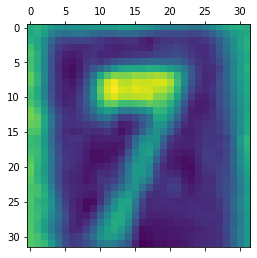

In [8]:
plt.matshow(x_train[2])

In [9]:
y_train[2]

7

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Flatten(input_shape=[32,32]))
model.add(Dense(200,activation='relu'))
model.add(Dense(50,activation='softplus'))
model.add(Dense(50,activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 200)               205000    
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
Total params: 217,600
Trainable params: 217,600
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [16]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 2.3037 - accuracy: 0.1286
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.6341 - accuracy: 0.4470
Epoch 3/10
1313/1313 [==============================] - 5s 3ms/step - loss: 1.2532 - accuracy: 0.6080
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1305 - accuracy: 0.6515
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 1.0515 - accuracy: 0.6796
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.9946 - accuracy: 0.6975
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.9454 - accuracy: 0.7138
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.9142 - accuracy: 0.7233
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.8826 - accuracy: 0.7331
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.861

In [17]:
y_predict=model.predict(x_test)

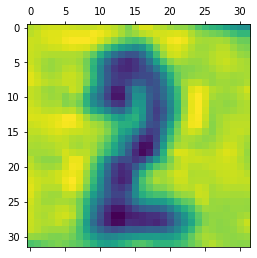

In [18]:
plt.matshow(x_test[2])

In [19]:
y_predict[2]

array([7.6421355e-05, 1.3681689e-04, 9.7509050e-01, 6.5133427e-03,
       1.5349939e-04, 1.8438470e-04, 2.5384664e-04, 1.6803788e-03,
       1.4723925e-02, 1.1869430e-03, 5.5928994e-12, 2.0749624e-13,
       1.5548865e-14, 1.2649009e-13, 2.7661982e-13, 4.7817531e-12,
       9.0843633e-14, 2.8173045e-13, 3.0069496e-13, 3.8736406e-14,
       8.4968848e-15, 3.0625651e-15, 1.1462965e-13, 1.3632902e-13,
       1.4445632e-15, 5.3038905e-13, 8.7335521e-13, 4.8655034e-15,
       1.8638470e-14, 1.0968089e-15, 1.3482028e-15, 3.0207171e-13,
       2.6870707e-13, 9.3245214e-13, 1.5001799e-13, 3.1371657e-15,
       3.1934809e-15, 1.2994736e-14, 1.6704964e-14, 9.8068645e-15,
       7.5336195e-13, 4.5229332e-15, 5.4302564e-14, 4.0179796e-15,
       3.9201542e-14, 9.3191190e-16, 5.8596333e-15, 1.1704858e-15,
       3.1136460e-13, 5.9726811e-13], dtype=float32)

In [20]:
np.argmax(y_predict[2])

2

In [21]:
model.evaluate(x_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.9733 - accuracy: 0.7078


[0.9733134508132935, 0.7078333497047424]

In [22]:
y_pred_labels=[np.argmax(i) for i in y_predict]

In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [24]:
print(conf_mat)



[[1385   21    4   55   22   15   75   19  113  105]
 [  66 1200   10  136   47   20   39   99  144   67]
 [  33   24 1218   87   20   30   25  152  118   96]
 [  50   28   28 1232   14  119   16   49  119   64]
 [  49   32   19   36 1261   28  143   13  165   66]
 [  77   16   13  139   18 1136   70   27  197   75]
 [ 155   22    7   34   41   46 1200   16  274   37]
 [  53   29   47   69   14   20   29 1406   65   76]
 [ 102   23   11   48   17   30   71   17 1403   90]
 [ 124   35    6   86   21   38   31   46  117 1300]]


Text(0.5, 42.0, 'predicted labels')

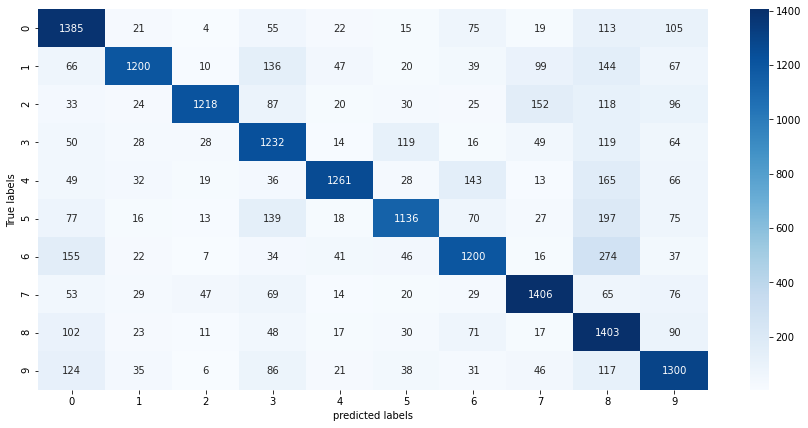

In [25]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('predicted labels')